# Sentiment Analysis of Restaurant Reviews

## Data Exploration

In [1]:
import pandas as pd
import numpy as np
import unicodedata, re, string
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Loading raw data
raw_train_data =  pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
raw_train_data.head()


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
raw_train_data.tail(n=5)

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [4]:
raw_train_data.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


<Axes: xlabel='Liked'>

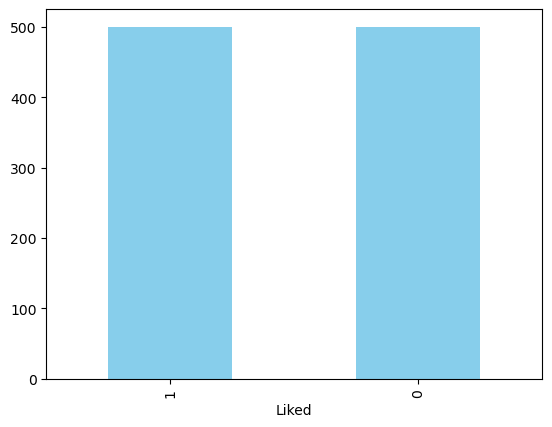

In [5]:
raw_train_data['Liked'].value_counts().plot.bar(color = 'skyblue')

the sentiments are equally divided

In [6]:
unimp =['food']

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words



def remove_numbers(words):
    """Remove all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        new_word = re.sub("\d+", "", word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def hashmap(words):
    new_words = []
    for word in words:
        if (word=='nt'):
            new_word = word.replace(word,'not')
            new_words.append(new_word)
    return new_words
 

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    stop_words=stopwords.words('english')
    stop_words.remove('not')
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = PorterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas



def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

 filtering out spaces and punctuation and lemmatizing and filtering out stop words 

In [7]:
# First step - tokenizing phrases
raw_train_data['Words'] = raw_train_data['Review'].apply(nltk.word_tokenize)

# Second step - passing through prep functions
raw_train_data['Words'] = raw_train_data['Words'].apply(normalize) 
print(raw_train_data['Words'])



0                                    [wow, loved, place]
1                                     [crust, not, good]
2                           [not, tasty, texture, nasty]
3      [stopped, late, may, bank, holiday, rick, stev...
4                       [selection, menu, great, prices]
                             ...                        
995              [think, food, flavor, texture, lacking]
996                          [appetite, instantly, gone]
997      [overall, not, impressed, would, not, go, back]
998    [whole, experience, underwhelming, think, go, ...
999    [nt, wasted, enough, life, poured, salt, wound...
Name: Words, Length: 1000, dtype: object


In [8]:
#Building a dictionary



# Building a dictionary
word_list = []
for index, value in raw_train_data['Words'].items():
    word_list.extend(value)

vocab = set(word_list)
vocab_set = sorted(vocab)

# Creating dictionary containing frequency of words
vocab_freq = dict()
for value in vocab_set:
    vocab_freq[value] = 0

for index, item in raw_train_data['Words'].items():
    for word in item:
        vocab_freq[word] = vocab_freq[word] + 1

In [9]:
#Creating dictionary containing frequency of words
vocab_freq = dict()

for value in vocab_set:
    vocab_freq[value]=0
    
for index,item in raw_train_data['Words'].items():
    for word in item:
        vocab_freq[word] = vocab_freq[word] + 1
        
vocab_freq

{'absolute': 1,
 'absolutely': 8,
 'absolutley': 1,
 'accident': 1,
 'accommodations': 1,
 'accomodate': 1,
 'accordingly': 1,
 'accountant': 1,
 'ache': 1,
 'acknowledged': 2,
 'across': 1,
 'actual': 1,
 'actually': 2,
 'added': 2,
 'affordable': 1,
 'afternoon': 1,
 'ago': 3,
 'ahead': 1,
 'airline': 1,
 'airport': 1,
 'ala': 1,
 'albondigas': 1,
 'allergy': 1,
 'almonds': 1,
 'almost': 2,
 'alone': 1,
 'also': 27,
 'although': 3,
 'always': 15,
 'amazing': 24,
 'ambiance': 7,
 'ambience': 3,
 'amount': 3,
 'ample': 1,
 'andddd': 1,
 'angry': 1,
 'another': 10,
 'anticipated': 1,
 'anymore': 1,
 'anyone': 2,
 'anything': 2,
 'anytime': 5,
 'anyway': 2,
 'anyways': 1,
 'apart': 1,
 'apologize': 1,
 'apology': 1,
 'app': 1,
 'appalling': 1,
 'apparently': 1,
 'appealing': 1,
 'appetite': 1,
 'appetizer': 1,
 'appetizers': 2,
 'apple': 1,
 'approval': 1,
 'area': 7,
 'arepas': 1,
 'aria': 1,
 'around': 8,
 'array': 1,
 'arrived': 3,
 'arrives': 1,
 'arriving': 1,
 'article': 1,
 'ask':

In [10]:
import operator
print("Total number of unique words: " + str(len(vocab_set)))
sorted_vocab_freq = list(reversed(sorted(vocab_freq.items(), key=operator.itemgetter(1))))
print("Top 100 most frequently used words: " + str(sorted_vocab_freq[:20]))

Total number of unique words: 1896
Top 100 most frequently used words: [('food', 125), ('not', 118), ('place', 106), ('nt', 96), ('good', 95), ('service', 83), ('great', 70), ('back', 61), ('like', 46), ('go', 43), ('time', 42), ('really', 36), ('would', 32), ('best', 30), ('ever', 28), ('friendly', 27), ('also', 27), ('one', 26), ('never', 26), ('restaurant', 25)]


In [11]:
corpus = []
for i in range(0,1000):
    reviews = raw_train_data['Words'][i]
    review = ' '.join(reviews)
    ''.join(set(review))
    corpus.append(review)
print(corpus)    

['wow loved place', 'crust not good', 'not tasty texture nasty', 'stopped late may bank holiday rick steve recommendation loved', 'selection menu great prices', 'getting angry want damn pho', 'honeslty nt taste fresh', 'potatoes like rubber could tell made ahead time kept warmer', 'fries great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still ended wayyy overpriced', 'tried cape cod ravoli chicken cranberry mmmm', 'disgusted pretty sure human hair', 'shocked signs indicate cash', 'highly recommended', 'waitress little slow service', 'place not worth time let alone vegas', 'not like', 'burrittos blah', 'food amazing', 'service also cute', 'could care less interior beautiful', 'performed', 'right red velvet cake ohhh stuff good', 'never brought salad asked', 'hole wall great mexican street tacos friendly staff', 'took hour get food tables restaurant food luke warm sever running around like totally overwhelmed', 'worst salmon sashimi', 'also combos like 

*************************************

Training data shape: (800, 1896)
Training labels shape: (800,)
Testing data shape: (200, 1896)
Testing labels shape: (200,)
Training Accuracy: 0.86125
Testing Accuracy: 0.82


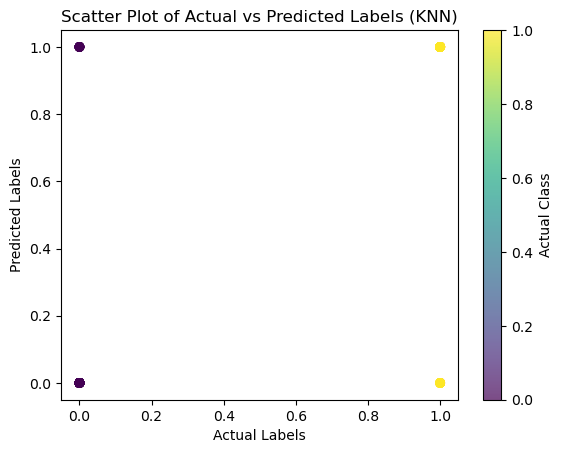

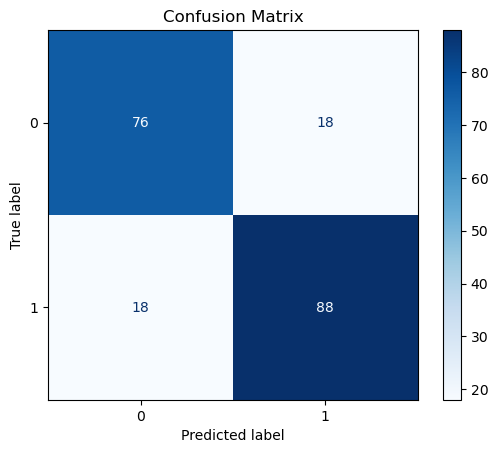

In [19]:
# Implementation of KNN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer()
x1 = vectorizer.fit_transform(corpus).toarray()
y = raw_train_data['Liked'].iloc[:].values

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.20, random_state=100)
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)

# Creating a robust scaler
rs = RobustScaler()
x_train = rs.fit_transform(x_train)
x_test = rs.fit_transform(x_test)

# Creating KNN model
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(x_train, y_train)

# Predicting the test set results
y_pred = model.predict(x_test)

# Checking the accuracies
print("Training Accuracy:", model.score(x_train, y_train))
print("Testing Accuracy:", model.score(x_test, y_test))



# Scatter plot with colors
plt.scatter(y_test, y_pred, c=y_test, cmap='viridis', alpha=0.7)
plt.title('Scatter Plot of Actual vs Predicted Labels (KNN)')
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.colorbar(label='Actual Class')
plt.show()


# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()



In [13]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [14]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text_rnn(text):
    # Convert to lowercase
    text = text.lower()

    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Example usage
raw_review = "The food was amazing, but the service was slow!"
preprocessed_tokens = preprocess_text_rnn(raw_review)
print("Raw Review:", raw_review)
print("Preprocessed Tokens:", preprocessed_tokens)

Raw Review: The food was amazing, but the service was slow!
Preprocessed Tokens: ['food', 'amazing', 'service', 'slow']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
raw_train_data = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
raw_train_data['Processed_Review'] = raw_train_data['Review'].apply(preprocess_text_rnn)




Epoch 1/5


25/25 [==============================] - 2s 30ms/step - loss: 0.6856 - accuracy: 0.6175 - val_loss: 0.6688 - val_accuracy: 0.5750
Epoch 2/5
25/25 [==============================] - 0s 11ms/step - loss: 0.5399 - accuracy: 0.7713 - val_loss: 0.5912 - val_accuracy: 0.6750
Epoch 3/5
25/25 [==============================] - 0s 11ms/step - loss: 0.2888 - accuracy: 0.9025 - val_loss: 0.5315 - val_accuracy: 0.8200
Epoch 4/5
25/25 [==============================] - 0s 11ms/step - loss: 0.1861 - accuracy: 0.9362 - val_loss: 0.4889 - val_accuracy: 0.8000
Epoch 5/5
25/25 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9862
Training Accuracy: 0.9862499833106995
7/7 [==============================] - 0s 5ms/step - loss: 0.7308 - accuracy: 0.8350
Testing Accuracy: 0.8349999785423279


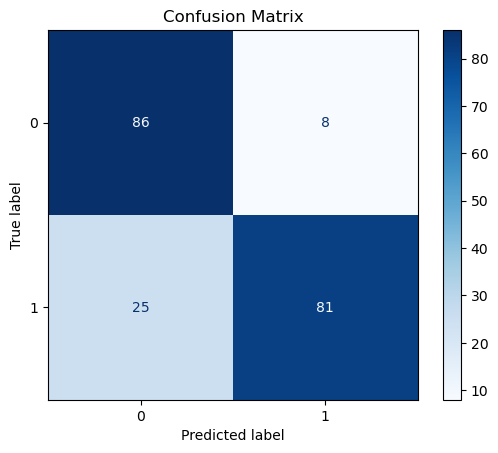

In [16]:
#Implementation of RNN
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


# Tokenize and pad the sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences)

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, raw_train_data['Liked'].values, test_size=0.20, random_state=100)

# Building the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=len(padded_sequences[0])))
model.add(LSTM(units=128))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Predicting the test set results
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Checking the accuracies
print("Training Accuracy:", model.evaluate(x_train, y_train)[1])
print("Testing Accuracy:", model.evaluate(x_test, y_test)[1])

# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y_test))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
